In [1]:
import numpy as np
import pandas as pd
from load_data import loadVectors
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
x_train, y_train, x_validation, y_validation, x_test = loadVectors()

In [3]:
y_train = y_train - 1
y_validation = y_validation - 1;

In [13]:
model = keras.Sequential([
    keras.layers.Dense(4096, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02), input_shape=(4096,)),
    keras.layers.Dropout(0.2),
    #keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.004)),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(29, activation='softmax')
])

In [14]:
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=['acc'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 29)                118813    
Total params: 16,900,125
Trainable params: 16,900,125
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_validation, y_validation))

Train on 5830 samples, validate on 2298 samples
Epoch 1/5
5830/5830 [==============================] - 103s 18ms/sample - loss: 13.5252 - acc: 0.6609 - val_loss: 3.8592 - val_acc: 0.6105
Epoch 2/5
5830/5830 [==============================] - 100s 17ms/sample - loss: 2.6781 - acc: 0.7321 - val_loss: 2.5769 - val_acc: 0.6658
Epoch 3/5
5830/5830 [==============================] - 98s 17ms/sample - loss: 1.9658 - acc: 0.7501 - val_loss: 2.0282 - val_acc: 0.6902
Epoch 4/5
5830/5830 [==============================] - 102s 17ms/sample - loss: 1.6474 - acc: 0.7679 - val_loss: 1.9408 - val_acc: 0.6780
Epoch 5/5
5830/5830 [==============================] - 108s 18ms/sample - loss: 1.5682 - acc: 0.7732 - val_loss: 1.8272 - val_acc: 0.6836


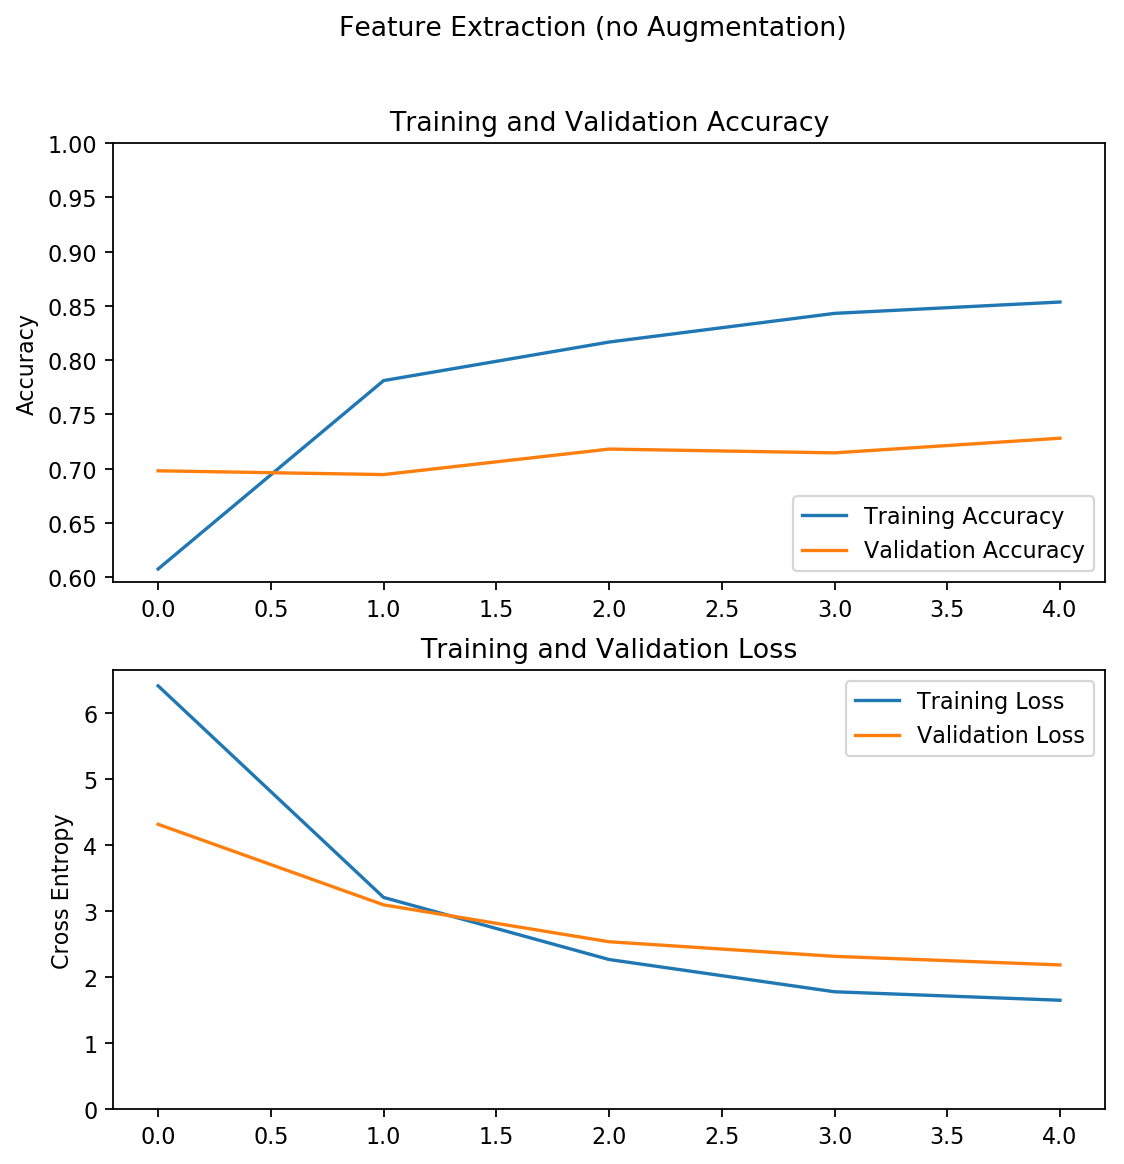

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8), dpi=160)
plt.suptitle('Feature Extraction (no Augmentation)')
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict(test)
predicted_class_indices=np.argmax(predictions,axis=1)
submission = pd.DataFrame({'id': np.arange(1,3461), 'label': predicted_class_indices})
submission.to_csv("submission.csv",index=False)